# Exploratory Data Analysis

1. Perform exploratory data analysis on the deals data for one day first (later for a week, month, etc.).

2. Find out the distribution of deals in each category and aggregate the sum of deals in each category.

3. Find out the hotness distribution

4. Look for factors may affect the hotness of deals.

In [14]:
import pandas as pd
import bamboolib as bam
bam.enable()

Success: the bamboolib extension was enabled successfully. You can disable it via 'bam.disable()'. You will now see a magic bamboolib button when you display your dataframes, for example via 'df'


Now we can read csv file

In [15]:
df = pd.read_csv('article.csv')

In [17]:
df

,_id,content_type,id,title,brief_title,offer_text,description_html,description_text,link,short_link,...,rebates,coupons,coupon_details,coupon_text,billable,facets,mfg_part_no,brand,images,utcFormattedDate
0,5e3cd2b542ef8205635344d6,ARTICLE,18172354,Petlinks Mobile Madness Spinning Feather Toy f...,Petlinks Mobile Madness Spinning Feather Toy f...,Petlinks Mobile Madness Spinning Feather Toy,"<div class=""snippet summary"" title=""That&#x27;...",That's $10 off list and the lowest price we co...,https://www.dealnews.com/Petlinks-Mobile-Madne...,http://dn.ws/athvm:eysu,...,[],[''],[],NaN,1,"{'131': {'1682': 1682}, '136': {'1780': 1780}}",NaN,NaN,{'small': {'url': 'https://cdlnws.a.ssl.fastly...,2019-09-30
1,5e3cd2b542ef8205635344d7,ARTICLE,18172339,Bluedio US Wireless Bluetooth 3D Speaker for $...,Bluedio US Wireless Bluetooth 3D Speaker for $25,Bluedio US Wireless Bluetooth 3D Speaker,"<div class=""snippet summary"" title=""That&#x27;...",That's $51 off and the lowest price we've seen...,https://www.dealnews.com/Bluedio-US-Wireless-B...,http://dn.ws/athv7:eysu,...,[],[''],[],NaN,1,"{'95': {'1541': 1541}, '136': {'1780': 1780}}",8002220010,Bluedio,{'small': {'url': 'https://cdlnws.a.ssl.fastly...,2019-09-30
2,5e3cd2b542ef8205635344d8,ARTICLE,18172312,Open-Box Logitech G933 Artemis Spectrum Wirele...,Logitech Artemis Wireless Gaming Headset for $65,Open-Box Logitech G933 Artemis Spectrum Wirele...,"<div class=""snippet summary"" title=""That&#x27;...",That's tied with our August mention as the low...,https://www.dealnews.com/Open-Box-Logitech-G93...,http://dn.ws/athug:eysu,...,[],[''],[],NaN,1,"{'131': {'1682': 1682}, '136': {'1783': 1783}}",G933,Logitech,{'small': {'url': 'https://cdlnws.a.ssl.fastly...,2019-09-30
3,5e3cd2b542ef8205635344d9,ARTICLE,18172180,Worx Air 20V Cordless Blower/Sweeper for $80 +...,Worx Air 20V Cordless Blower/Sweeper for $80,Worx Air 20V Cordless Blower/Sweeper,"<div class=""snippet summary"" title=""That&#x27;...",That's the lowest price we could find by $37. ...,https://www.dealnews.com/Worx-Air-20-V-Cordles...,http://dn.ws/athqs:eysu,...,[],[''],[],NaN,1,"{'131': {'1682': 1682}, '136': {'1780': 1780}}",WG545.4,Worx Tools,{'small': {'url': 'https://cdlnws.a.ssl.fastly...,2019-09-30
4,5e3cd2b542ef8205635344da,ARTICLE,18172171,WaterPik 8-Mode PowerSpray+ Handheld Shower He...,WaterPik 8-Mode PowerSpray+ Handheld Shower He...,WaterPik 8-Mode PowerSpray+ Handheld Shower Head,"<div class=""snippet summary"" title=""That&#x27;...",That's $11 under the lowest price we could fin...,https://www.dealnews.com/Water-Pik-8-Mode-Powe...,http://dn.ws/athqj:eysu,...,[],[''],[],NaN,1,{'136': {'1783': 1783}},NSP-853E,WaterPik,{'small': {'url': 'https://cdlnws.a.ssl.fastly...,2019-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,5e3cd2b942ef82056353503d,ARTICLE,18198913,SanDisk 400GB Ultra Class 10 UHS-I Micro SD Ca...,SanDisk 400GB Ultra Class 10 UHS-I Micro SD Ca...,SanDisk 400GB Ultra Class 10 UHS-I Micro SD Card,"<div class=""snippet summary"" title=""It&#x27;s&...","It's the best deal we've seen, and the lowest ...",https://www.dealnews.com/San-Disk-400-GB-Ultra...,http://dn.ws/au2dd:eysu,...,[],['HOME15'],[],"Use coupon code ""HOME15"".",1,"{'103': {'1564': 1564}, '131': {'1682': 1682},...",SDSQUAR-400G-GN6MA,SanDisk,{'small': {'url': 'https://cdlnws.a.ssl.fastly...,2019-10-30
1506,5e3cd2b942ef82056353503e,ARTICLE,18198883,"Apple iPad 6th-Gen. 9.7"" 128GB WiFi + LTE Tabl...","Apple iPad 6th-Gen. 9.7"" 128GB WiFi + LTE Tabl...","Apple iPad 6th-Gen. 9.7"" 128GB WiFi + LTE Tablet","<div class=""snippet summary"" title=""That&#x27;...",That's the best deal we could find by $130. Bu...,https://www.dealnews.com/Apple-iPad-6-th-Gen.-...,http://dn.ws/au2cj:eysu,...,[],[''],[],NaN,1,"{'84': {'1431': 1431}, '136': {'1783': 1783}}",MR7C2LL/A,Apple,{'small': {'url': 'https://cdlnws.a.ssl.fastly...,2019-10-30
1507,5e3cd2b942ef82056353503f,ARTICLE,18198844,Jos. A. Bank Men's Trav

Check the column types

In [4]:
df.dtypes

_id                         object
content_type                object
id                           int64
title                       object
brief_title                 object
offer_text                  object
description_html            object
description_text            object
link                        object
short_link                  object
buy_now_link                object
pub_date                    object
updated                     object
promoted                     int64
expires                     object
section_name                object
section_sort                 int64
hotness                      int64
hotness_score                int64
value_index                float64
direct_link                   bool
direct_link_with_coupon     object
categories                  object
stores                      object
price                       object
exact_price                float64
price_text                  object
price_extra                float64
rebates             

In [5]:
Lets drop useless columns. For example column 'promoted'. As we can see all rows of this column contain '0'

SyntaxError: invalid syntax (<ipython-input-5-864dafc52279>, line 1)

In [5]:
df['promoted'].value_counts()

0    1510
Name: promoted, dtype: int64

The same situation with following columns: rebates,coupon_details and billable

In [6]:
df = df.drop(['promoted', 'rebates', 'coupon_details','billable'], axis=1)
df.head(5)

,_id,content_type,id,title,brief_title,offer_text,description_html,description_text,link,short_link,...,exact_price,price_text,price_extra,coupons,coupon_text,facets,mfg_part_no,brand,images,utcFormattedDate
0,5e3cd2b542ef8205635344d6,ARTICLE,18172354,Petlinks Mobile Madness Spinning Feather Toy f...,Petlinks Mobile Madness Spinning Feather Toy f...,Petlinks Mobile Madness Spinning Feather Toy,"<div class=""snippet summary"" title=""That&#x27;...",That's $10 off list and the lowest price we co...,https://www.dealnews.com/Petlinks-Mobile-Madne...,http://dn.ws/athvm:eysu,...,5.49,$5.49,NaN,[''],NaN,"{'131': {'1682': 1682}, '136': {'1780': 1780}}",NaN,NaN,{'small': {'url': 'https://cdlnws.a.ssl.fastly...,2019-09-30
1,5e3cd2b542ef8205635344d7,ARTICLE,18172339,Bluedio US Wireless Bluetooth 3D Speaker for $...,Bluedio US Wireless Bluetooth 3D Speaker for $25,Bluedio US Wireless Bluetooth 3D Speaker,"<div class=""snippet summary"" title=""That&#x27;...",That's $51 off and the lowest price we've seen...,https://www.dealnews.com/Bluedio-US-Wireless-B...,http://dn.ws/athv7:eysu,...,24.99,$24.99,NaN,[''],NaN,"{'95': {'1541': 1541}, '136': {'1780': 1780}}",8002220010,Bluedio,{'small': {'url': 'https://cdlnws.a.ssl.fastly...,2019-09-30
2,5e3cd2b542ef8205635344d8,ARTICLE,18172312,Open-Box Logitech G933 Artemis Spectrum Wirele...,Logitech Artemis Wireless Gaming Headset for $65,Open-Box Logitech G933 Artemis Spectrum Wirele...,"<div class=""snippet summary"" title=""That&#x27;...",That's tied with our August mention as the low...,https://www.dealnews.com/Open-Box-Logitech-G93...,http://dn.ws/athug:eysu,...,64.99,$64.99,NaN,[''],NaN,"{'131': {'1682': 1682}, '136': {'1783': 1783}}",G933,Logitech,{'small': {'url': 'https://cdlnws.a.ssl.fastly...,2019-09-30
3,5e3cd2b542ef8205635344d9,ARTICLE,18172180,Worx Air 20V Cordless Blower/Sweeper for $80 +...,Worx Air 20V Cordless Blower/Sweeper for $80,Worx Air 20V Cordless Blower/Sweeper,"<div class=""snippet summary"" title=""That&#x27;...",That's the lowest price we could find by $37. ...,https://www.dealnews.com/Worx-Air-20-V-Cordles...,http://dn.ws/athqs:eysu,...,79.99,$79.99,NaN,[''],NaN,"{'131': {'1682': 1682}, '136': {'1780': 1780}}",WG545.4,Worx Tools,{'small': {'url': 'https://cdlnws.a.ssl.fastly...,2019-09-30
4,5e3cd2b542ef8205635344da,ARTICLE,18172171,WaterPik 8-Mode PowerSpray+ Handheld Shower He...,WaterPik 8-Mode PowerSpray+ Handheld Shower He...,WaterPik 8-Mode PowerSpray+ Handheld Shower Head,"<div class=""snippet summary"" title=""That&#x27;...",That's $11 under the lowest price we could fin...,https://www.dealnews.com/Water-Pik-8-Mode-Powe...,http://dn.ws/athqj:eysu,...,23.64,$23.64,NaN,[''],NaN,{'136': {'1783': 1783}},NSP-853E,WaterPik,{'small': {'url': 'https://cdlnws.a.ssl.fastly...,2019-09-30


Now we can drop duplicates

In [7]:
df = df.drop_duplicates()

Lets see how many null values are in data frame 

In [8]:
df.isnull().sum()

_id                           0
content_type                  0
id                            0
title                         0
brief_title                   0
offer_text                    0
description_html              0
description_text              0
link                          0
short_link                    0
buy_now_link                  0
pub_date                      0
updated                       0
expires                    1206
section_name                  0
section_sort                  0
hotness                       0
hotness_score                 0
value_index                   0
direct_link                   0
direct_link_with_coupon       0
categories                    0
stores                        0
price                       188
exact_price                 148
price_text                  188
price_extra                1510
coupons                       0
coupon_text                1224
facets                        0
mfg_part_no                 967
brand   

In [9]:
df = df.drop(['price_extra'], axis=1)
df.isnull().sum()

_id                           0
content_type                  0
id                            0
title                         0
brief_title                   0
offer_text                    0
description_html              0
description_text              0
link                          0
short_link                    0
buy_now_link                  0
pub_date                      0
updated                       0
expires                    1206
section_name                  0
section_sort                  0
hotness                       0
hotness_score                 0
value_index                   0
direct_link                   0
direct_link_with_coupon       0
categories                    0
stores                        0
price                       188
exact_price                 148
price_text                  188
coupons                       0
coupon_text                1224
facets                        0
mfg_part_no                 967
brand                       325
images  

To simplify category we can create new column 'category' that will contain category name from 'categories'

In [10]:
df['category'] = df['categories'].apply(lambda x: x.split(",")[1].split(":")[1].replace("'","").strip())
df['category'].head()

0                 Pets
1    Portable Speakers
2          Accessories
3         Garden Tools
4           Bed & Bath
Name: category, dtype: object

Aggregate the sum of deals in each category.

In [11]:
df['category'].value_counts()

Shoes                        95
TVs                          85
Toys & Hobbies               83
Laptops                      69
Coats                        39
                             ..
Portable Power Banks          1
Universal Remote Controls     1
Hair Care                     1
Greeting Cards                1
Microphones                   1
Name: category, Length: 186, dtype: int64

Find out the distribution of deals in each category

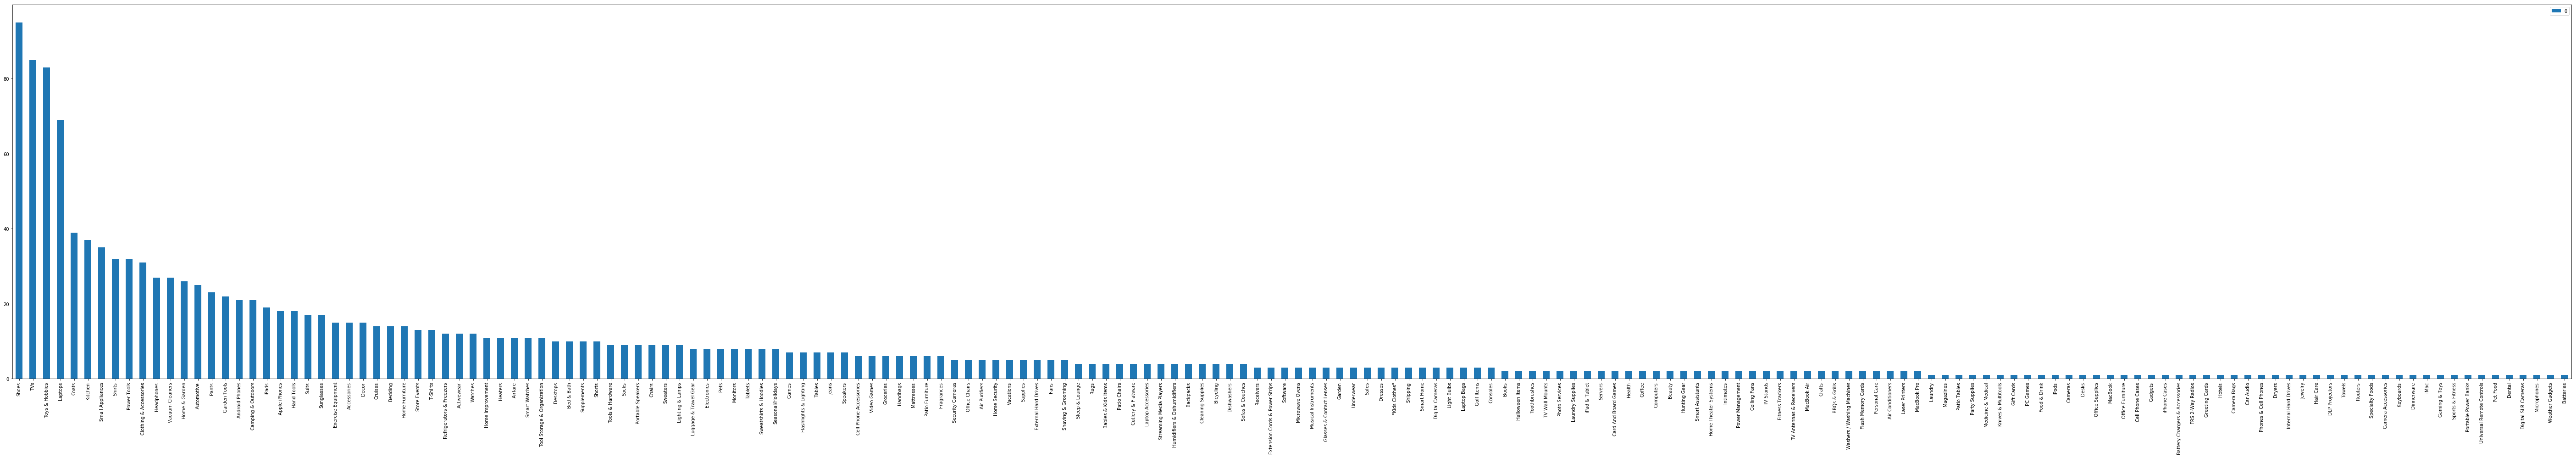

In [42]:
values = df['category'].value_counts().to_dict()
df_categories = pd.DataFrame.from_dict(values, orient='index')
df_categories.plot(kind='bar',figsize=[100,15])

Find out the hotness distribution

In [12]:
hotness = df['hotness'].value_counts().to_dict()
hotness

{3: 763, 2: 386, 4: 200, 1: 112, 5: 49}

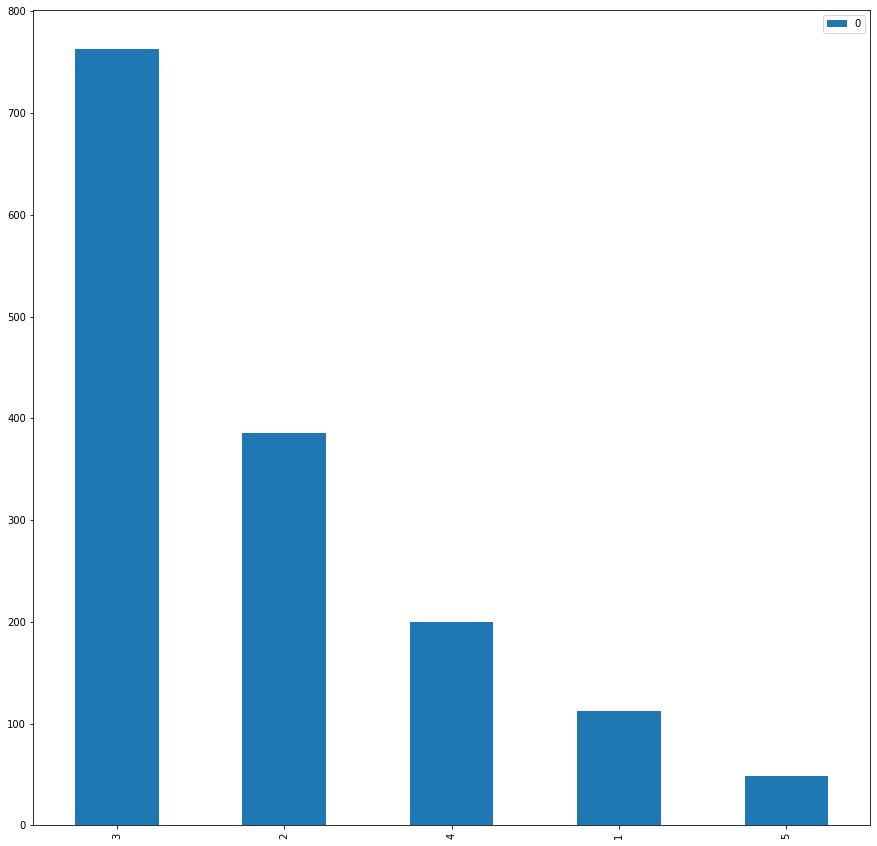

In [13]:
df_hotness = pd.DataFrame.from_dict(hotness, orient='index')
df_hotness.plot(kind='bar',figsize=[15,15])

Look for factors may affect the hotness of deals.
To do that we will find correlation using kendall's method

In [51]:
df.corr(method ='kendall')

,id,promoted,section_sort,hotness,hotness_score,value_index,direct_link,exact_price,price_extra,billable
id,1.000000,NaN,-0.080837,0.177640,0.184356,0.020670,-0.081090,0.023867,NaN,NaN
promoted,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
section_sort,-0.080837,NaN,1.000000,-0.029635,-0.029603,0.016889,-0.045901,-0.233660,NaN,NaN
hotness,0.177640,NaN,-0.029635,1.000000,0.811350,0.118065,0.005431,-0.078623,NaN,NaN
hotness_score,0.184356,NaN,-0.029603,0.811350,1.000000,0.121238,-0.003011,-0.075900,NaN,NaN
value_index,0.020670,NaN,0.016889,0.118065,0.121238,1.000000,-0.162171,0.091363,NaN,NaN
direct_link,-0.081090,NaN,-0.045901,0.005431,-0.003011,-0.162171,1.000000,0.068885,NaN,NaN
exact_price,0.023867,NaN,-0.233660,-0.078623,-0.075900,0.091363,0.068885,1.000000,NaN,NaN
price_extra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
billable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


As we can see the most influential factor is hotness_score (0.811)